### Computer Vision with Keras

In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os, shutil
import tensorflow as tf
import math
import h5py
import scipy
import keras
import PIL


from tensorflow.keras import models, layers
from PIL import Image
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
%matplotlib inline

In [15]:
# Load the mnist dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
# Examine the dataset
print("Initial shape of X_train:", str(X_train.shape))
print("Number of samples in our training data:", str(X_train.shape[0]))
print("Number of labels in our training data:", str(y_train.shape[0]))
print("Number of samples in our test data:", str(X_test.shape[0]))
print("Number of labels in our test data:", str(y_test.shape[0]))


Initial shape of X_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


In [17]:
# View some images
# We can view this images using OpenCV or matplotlib

#Using OpenCV
import cv2

for i in range(6):
    random_num = np.random.randint(0, len(X_train))
    img = X_train[random_num]
    window_name =  "Random sample #" + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

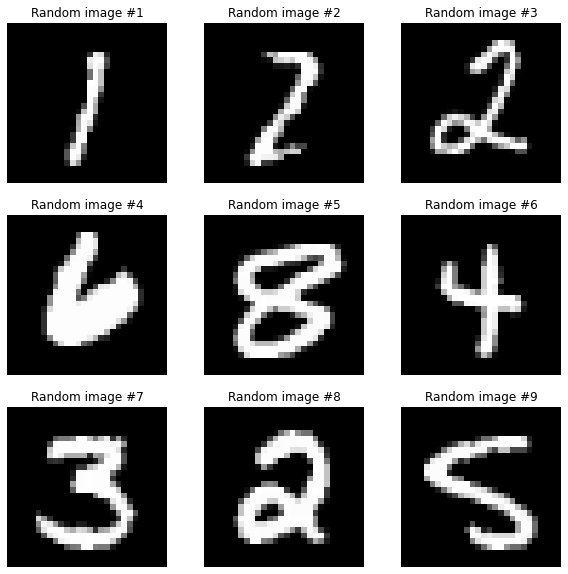

In [18]:
# Using maplotlib
fig = plt.figure(figsize=(10, 10))
rows = 3
columns = 3

for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    random_num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Random image #"+str(i))
plt.show()

In [19]:
# Prepare the dataset for training
img_height = X_train[0].shape[0]
img_width = X_train[0].shape[1]

#Reshape the data
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1)
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1)

# Store the shape of a single image
input_shape = X_train[0].shape

# Change the image type tp float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data by changing the range from (0-255) to (0,1)
X_train /= 255
X_test /= 255

In [20]:
# One Hot Encoding for labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
# build the model
num_classes = y_train.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense (num_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(0.01), metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [24]:
# Training the model
batch_size = 32
epochs = 5

history = model.fit(X_train,
                    y_train, batch_size=batch_size,
                    epochs = epochs, verbose= 1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 324s 173ms/step - loss: 0.3251 - accuracy: 0.9010 - val_loss: 0.1484 - val_accuracy: 0.9563
Epoch 2/5
1875/1875 [==============================] - 360s 192ms/step - loss: 0.2352 - accuracy: 0.9290 - val_loss: 0.1165 - val_accuracy: 0.9669 ETA: 1:02 - loss: 0.2426 - accuracy - ETA: 1:01 - loss: 0.24 - ETA: 59s - loss: 0.2419 -  - ETA: 56s - lo
Epoch 3/5
1875/1875 [==============================] - 315s 168ms/step - loss: 0.1797 - accuracy: 0.9463 - val_loss: 0.0902 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 299s 160ms/step - loss: 0.1436 - accuracy: 0.9576 - val_loss: 0.0709 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 302s 161ms/step - loss: 0.1249 - accuracy: 0.9630 - val_loss: 0.0624 - val_accuracy: 0.9800


In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

Test loss: 0.06236500293016434
Test accuracy 0.9800000190734863


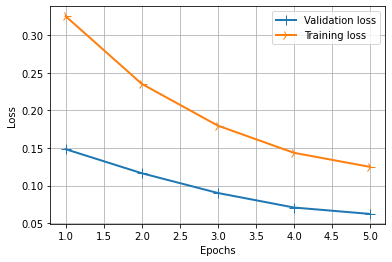

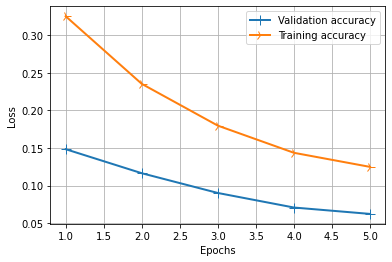

In [26]:
# Plotting the training stats

def plot_training_stats(model_history):
    history_dict = model_history.history

    loss_values = history_dict['loss']
    val_loss = history_dict['val_loss']
    val_accuracy = history_dict['accuracy']
    accuracy_values = history_dict['val_accuracy']

    epochs = range(1, len(loss_values) + 1)

    line1= plt.plot(epochs, val_loss, label="Validation loss")
    line2 = plt.plot(epochs, loss_values, label="Training loss")
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

    line1= plt.plot(epochs, val_loss, label="Validation accuracy")
    line2 = plt.plot(epochs, loss_values, label="Training accuracy")
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()
    return

plot_training_stats(history)

In [27]:
# Saving the model
model.save("First CNN.h5")

# Loading the model
from keras.models import load_model

classifier = load_model("First CNN.h5")

In [28]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy", score[1])

Test loss: 0.06236500293016434
Test accuracy 0.9800000190734863


In [31]:
# Using the classifier to predict some test images

def draw_test(name, pred, input_img):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_img, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expanded_image)

for i in range(10):
    rand = np.random.randint(0, len(X_test))
    input_img = X_test[rand]
    
    imageL = cv2.resize(input_img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_img = input_img.reshape(1, 28, 28, 1)
    
    #Get prediction
    res = str(classifier.predict_classes(input_img, 1, verbose=0)[0])
    draw_test("Prediction", res, imageL)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
# Visualing the model
from tensorflow.keras.utils import plot_model
path = ""
plot_model(model, to_file="model_path.png", show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
